In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_excel('data.xlsx')
# 性別
X = pd.DataFrame(df['1. 生理性別'])

# 類組（一二三類）
X['類組'] = '第一類組'
X.loc[df['2. 學院'].str.contains('理|工|電|資|原子|半導體|科學'), '類組'] = '第二類組'
X.loc[df['2. 學院'].str.contains('醫|生命科學|生物|藥物科學|護理'), '類組'] = '第三類組'

# 年級（一二、三、四以上）大三是人生重要轉淚點 
X['年紀'] = '大三以下'
X.loc[df['3. 年級'].str.contains('大三'), '年紀'] = '大三'
X.loc[df['3. 年級'].str.contains('大四－大六|碩士|博士'), '年紀'] = '大三以上'

# 台灣風氣看法（不一定要生、生1 2 3）
X['生育個數風氣'] = '不生'
X.loc[df['4. 請問你認為關於生育，台灣目前的風氣為何？'].str.contains('生1個|生2個|生3個'), '生育個數風氣'] = '生'

# 家務分工（自己、平均、伴侶）
# question = '5. 依你過往的觀察，你認為台灣家庭中誰負擔較多養育小孩及打理家務的責任？'
# X['家務分工'] = '家務平均負擔'
# X.loc[df[question].str.contains('父親'), '家務分工'] = '父親負擔較多家務'
# X.loc[df[question].str.contains('母親'), '家務分工'] = '母親負擔較多家務'

# 對台灣少子化政策暸解（0、12、345)
question = '10. 請問你認為你多了解台灣目前對應少子化的政策？（生育津貼、托育補助等）'
X['政策了解'] = '不了解台灣政策'
X.loc[df[question].astype(str).str.contains('1' or '2'), '政策了解'] = '了解台灣政策'
X.loc[df[question].astype(str).str.contains('3' or '4' or '5'), '政策了解'] = '非常了解台灣政策'


# 少子化政策是否足夠（0、12、345）
question = '11. 請問你認為台灣政府目前對應少子化的政策是否足夠？'
X['政策足夠'] = '少子化的政策不足'
X.loc[df[question].astype(str).str.contains('1' or '2'), '政策足夠'] = '少子化的政策尚可'
X.loc[df[question].astype(str).str.contains('3' or '4' or '5'), '政策足夠'] = '少子化的政策足夠'


y = pd.DataFrame(df['7. 請問你打算生小孩嗎？'])

print(X.head())
print(y.head())

  1. 生理性別    類組    年紀 生育個數風氣      政策了解      政策足夠
0     生理男  第二類組    大三      生   不了解台灣政策  少子化的政策尚可
1     生理男  第三類組  大三以上     不生   不了解台灣政策  少子化的政策尚可
2      其他  第二類組    大三      生   不了解台灣政策  少子化的政策不足
3     生理女  第一類組  大三以下      生  非常了解台灣政策  少子化的政策不足
4     生理女  第一類組    大三     不生  非常了解台灣政策  少子化的政策足夠
  7. 請問你打算生小孩嗎？
0            不生
1            不生
2             生
3            不生
4            不生


In [12]:
x = pd.get_dummies(X)
print(x)

     1. 生理性別_其他  1. 生理性別_生理女  1. 生理性別_生理男  類組_第一類組  類組_第三類組  類組_第二類組  年紀_大三  \
0         False        False         True    False    False     True   True   
1         False        False         True    False     True    False  False   
2          True        False        False    False    False     True   True   
3         False         True        False     True    False    False  False   
4         False         True        False     True    False    False   True   
..          ...          ...          ...      ...      ...      ...    ...   
116       False         True        False     True    False    False   True   
117       False         True        False    False    False     True  False   
118       False        False         True    False    False     True  False   
119       False         True        False    False    False     True  False   
120       False        False         True    False    False     True  False   

     年紀_大三以上  年紀_大三以下  生育個數風氣_不生  生育個數風氣_生  政策了解_不了

In [13]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_Y, val_Y = train_test_split(x, y, test_size=0.2, random_state=42)
print(train_X.shape, val_X.shape, train_Y.shape, val_Y.shape)
print(train_X)
print(val_X)

(96, 17) (25, 17) (96, 1) (25, 1)
     1. 生理性別_其他  1. 生理性別_生理女  1. 生理性別_生理男  類組_第一類組  類組_第三類組  類組_第二類組  年紀_大三  \
12        False         True        False    False    False     True   True   
15        False        False         True    False    False     True   True   
115       False         True        False    False    False     True  False   
76        False         True        False    False    False     True   True   
98        False         True        False     True    False    False  False   
..          ...          ...          ...      ...      ...      ...    ...   
106       False         True        False     True    False    False   True   
14        False        False         True    False    False     True  False   
92        False         True        False     True    False    False   True   
51        False         True        False     True    False    False   True   
102       False         True        False    False    False     True   True   

     年紀_大三以上  年紀_

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': range(2, 6),  # Adjust max_depth as needed
    'min_samples_split': range(1, 6),  # Adjust min_samples_split as needed
    'min_samples_leaf': range(2, 5)  # Adjust min_samples_leaf as needed
}

# Initialize a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(train_X, train_Y)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
train_accuracy = best_model.score(train_X, train_Y)
print("Train Accuracy:", train_accuracy)

# Evaluate the best model on the validation set
val_accuracy = best_model.score(val_X, val_Y)
print("Validation Accuracy:", val_accuracy)

# You can also access the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Train Accuracy: 0.6666666666666666
Validation Accuracy: 0.72
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}


c:\Users\domin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\domin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\domin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\domin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\domin\anaconda3\Lib\site-packages\sklearn\base.py", line 

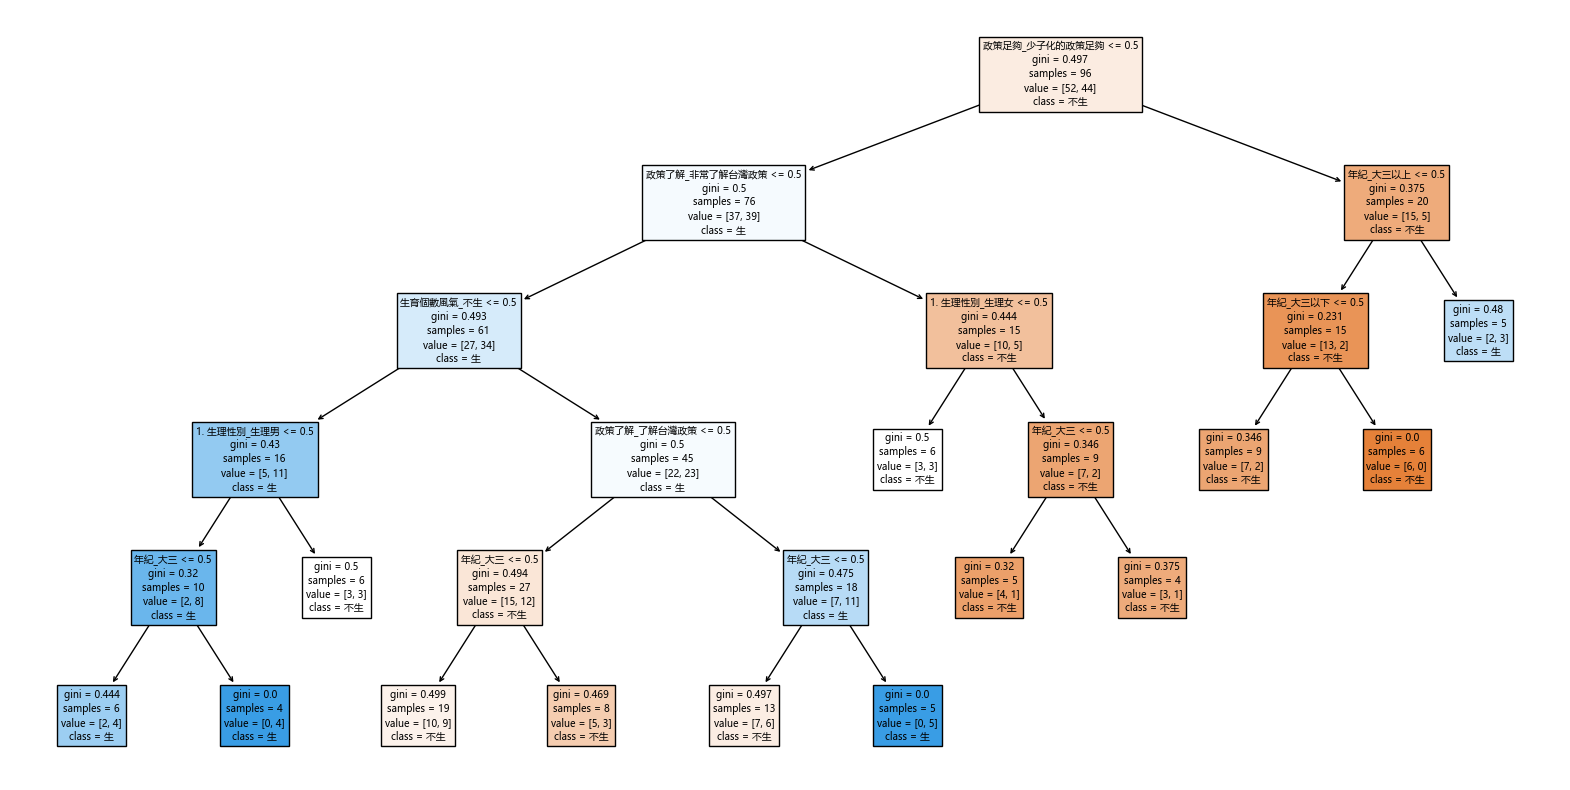

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
# Set font to support Chinese characters
plt.rcParams['font.sans-serif'] = ['STHeiti', 'SimHei', 'Microsoft YaHei', 'Noto Sans CJK SC', 'Arial']

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(best_model, filled=True, feature_names=x.columns, class_names=['不生', '生'])
plt.show()

plt.savefig('decision_tree_plot.png')